
# MNIST 分类

In [3]:
import numpy as np
from sklearn.linear_model import SGDClassifier

## 1.数据准备、创建测试集

In [7]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

11493376/11490434 [==============================] - 10s 1us/step


### 探索数据集

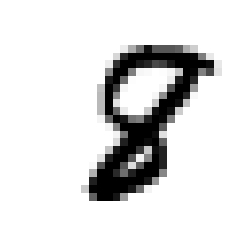

8


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_train[36000]
some_digit = some_digit.reshape(28, 28)
plt.imshow(some_digit, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

print(y_train[36000])

## 3.训练分类模型

In [12]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

/home/wangzhefeng/project/mlenv/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


ValueError: Found array with dim 3. Estimator expected <= 2.

## 4.交叉验证

### 4.1 方法 1

In [ ]:
from skleasrn.model_selection import StratifiedFold
from sklearn.base import clone

skfolds = StratifiedFold(n_split = 3, random_state = 42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])
    
    clone_clf.git(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

### 4.2 方法 2

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_trian_5, cv = 3, scoring = "accuracy")